In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import dateutil
import datetime

In [2]:
data = pd.read_csv("Motor_Vehicle_Collisions_Crashes_NYPD.csv", low_memory = False)
data['CRASH DATE'] = data['CRASH DATE'].apply(dateutil.parser.parse, dayfirst=True)

In [3]:
data['year'] = pd.DatetimeIndex(data['CRASH DATE']).year
data['month'] = pd.DatetimeIndex(data['CRASH DATE']).month
data['season'] = (data['month']%12 + 3)//3
seasons = {1: '1 Winter', 2: '2 Spring', 3: '3 Summer', 4: '4 Autumn'}
data['season_name'] = data['season'].map(seasons)
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,year,month,season,season_name
0,2021-02-02,0:00,NaN,NaN,NaN,NaN,NaN,NEW ENGLAND THRUWAY,NaN,NaN,...,4388602,Sedan,NaN,NaN,NaN,NaN,2021,2,1,1 Winter
1,2021-01-02,0:15,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,4388510,Sedan,Sedan,NaN,NaN,NaN,2021,1,1,1 Winter
2,2021-01-02,15:30,NaN,NaN,40.697815,-73.7602,"(40.697815, -73.7602)",114 ROAD,NaN,NaN,...,4388639,Sedan,NaN,NaN,NaN,NaN,2021,1,1,1 Winter
3,2021-01-02,2:35,NaN,NaN,NaN,NaN,NaN,PROSPECT EXPRESSWAY RAMP,NaN,NaN,...,4388200,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2021,1,1,1 Winter
4,2020-10-27,9:00,NaN,NaN,NaN,NaN,NaN,BRUCKNER EXPRESSWAY,NaN,NaN,...,4361834,commercial,Sedan,NaN,NaN,NaN,2020,10,4,4 Autumn


In [4]:
data.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [8]:
df = data
df['Casualty'] = np.where(df['NUMBER OF PERSONS INJURED']+df['NUMBER OF PERSONS KILLED']>0, True, False)
df1 = df.groupby(['season_name', 'Casualty']).size().reset_index(name = 'Counts')
df1['ratio'] = df1['Counts']/df1.groupby('season_name')['Counts'].transform('sum')
df1 = df1[df1['Casualty'] == True]
df1

,season_name,Casualty,Counts,ratio
1,1 Winter,True,82315,0.194778
3,2 Spring,True,81808,0.196352
5,3 Summer,True,93842,0.206267
7,4 Autumn,True,93943,0.204976


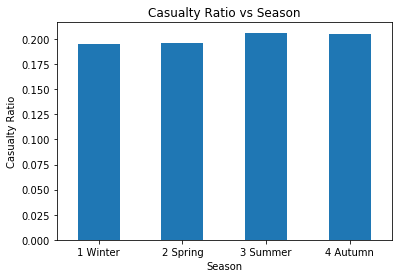

In [9]:
import matplotlib.pyplot as plt
df1.plot.bar(x='season_name', y='ratio', rot=0, legend=False)
plt.title('Casualty Ratio vs Season')
plt.ylabel('Casualty Ratio')
plt.xlabel('Season')
plt.show()

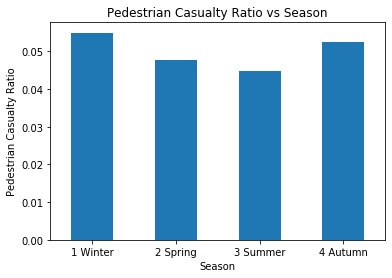

,season_name,PEDESTRIANS CASUALTY,Counts,ratio
1,1 Winter,True,23221,0.054947
3,2 Spring,True,19917,0.047804
5,3 Summer,True,20339,0.044706
7,4 Autumn,True,24023,0.052416


In [10]:
df2 = df
df2['PEDESTRIANS CASUALTY']= np.where(df['NUMBER OF PEDESTRIANS INJURED']+df['NUMBER OF PEDESTRIANS KILLED']>0, True, False)
df2 = df.groupby(['season_name', 'PEDESTRIANS CASUALTY']).size().reset_index(name = 'Counts')
df2['ratio'] = df2['Counts']/df2.groupby('season_name')['Counts'].transform('sum')
df2 = df2[df2['PEDESTRIANS CASUALTY'] == True]
import matplotlib.pyplot as plt
df2.plot.bar(x='season_name', y='ratio', rot=0, legend=False)
plt.title('Pedestrian Casualty Ratio vs Season')
plt.ylabel('Pedestrian Casualty Ratio')
plt.xlabel('Season')
plt.show()
df2

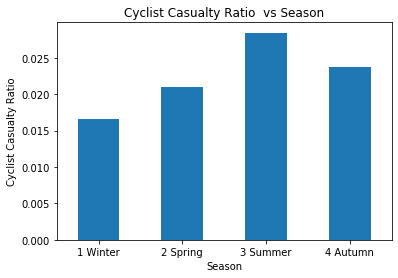

,season_name,CYCLIST CASUALTY,Counts,ratio
1,1 Winter,True,7000,0.016564
3,2 Spring,True,8734,0.020963
5,3 Summer,True,12937,0.028436
7,4 Autumn,True,10902,0.023787


In [11]:
df3 = df
df3['CYCLIST CASUALTY']= np.where(df['NUMBER OF CYCLIST INJURED']+df['NUMBER OF CYCLIST INJURED']>0, True, False)
df3 = df.groupby(['season_name', 'CYCLIST CASUALTY']).size().reset_index(name = 'Counts')
df3['ratio'] = df3['Counts']/df3.groupby('season_name')['Counts'].transform('sum')
df3 = df3[df3['CYCLIST CASUALTY'] == True]
import matplotlib.pyplot as plt
df3.plot.bar(x='season_name', y='ratio', rot=0, legend=False)
plt.title('Cyclist Casualty Ratio  vs Season')
plt.ylabel('Cyclist Casualty Ratio')
plt.xlabel('Season')
plt.show()
df3

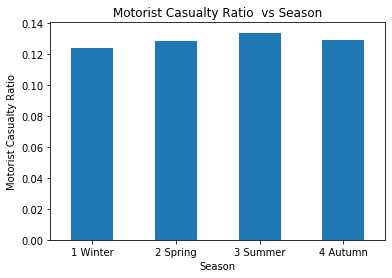

,season_name,MOTORIST CASUALTY,Counts,ratio
1,1 Winter,True,52300,0.123755
3,2 Spring,True,53548,0.128524
5,3 Summer,True,60907,0.133875
7,4 Autumn,True,59242,0.129261


In [12]:
df4 = df
df4['MOTORIST CASUALTY']= np.where(df['NUMBER OF MOTORIST INJURED']+df['NUMBER OF MOTORIST INJURED']>0, True, False)
df4 = df.groupby(['season_name', 'MOTORIST CASUALTY']).size().reset_index(name = 'Counts')
df4['ratio'] = df4['Counts']/df4.groupby('season_name')['Counts'].transform('sum')
df4 = df4[df4['MOTORIST CASUALTY'] == True]
import matplotlib.pyplot as plt
df4.plot.bar(x='season_name', y='ratio', rot=0, legend=False)
plt.title('Motorist Casualty Ratio  vs Season')
plt.ylabel('Motorist Casualty Ratio')
plt.xlabel('Season')
plt.show()
df4